In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [6]:
train_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/train.csv')
test_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/test.csv')

Data science is not a linear process. In this project, in particular, you will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. Here's an example:

- During basic EDA, you identify many missing values in a column/feature.  
- You consult the data dictionary and use domain knowledge to decide what is meant by this missing feature.  
- You impute a reasonable value for the missing value.  
- You plot the distribution of your feature.  
- You realize what you imputed has negatively impacted your data quality.  
- You cycle back, re-load your clean data, re-think your approach, and find a better solution.  

In [7]:
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


## MS SubClass (Nominal):

In [10]:
# MS SubClass
mssc_dummies = train_df[['Id','MS SubClass']]
ms_new = pd.get_dummies(columns=['MS SubClass'], data=mssc_dummies, drop_first=True)

In [11]:
ms_new

,Id,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,MS SubClass_70,MS SubClass_75,MS SubClass_80,MS SubClass_85,MS SubClass_90,MS SubClass_120,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190
0,109,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,544,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,153,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,318,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1587,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2047,785,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2048,916,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2049,639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
X = ms_new[['MS SubClass_30', 'MS SubClass_40', 'MS SubClass_45', 'MS SubClass_50', 'MS SubClass_60', 'MS SubClass_70', 'MS SubClass_75', 'MS SubClass_80', 'MS SubClass_85', 'MS SubClass_90', 'MS SubClass_120', 'MS SubClass_150', 'MS SubClass_160', 'MS SubClass_180','MS SubClass_190']]
y = train_df['SalePrice']

In [15]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef

In [16]:
y_pred, y_intercept, y_coef = slr_model(X, y)

In [19]:
metrics.mean_squared_error(y, y_pred, squared=False)

68317.74141069653

## MS Zoning (Nominal):

In [27]:
# MS Zoning
msz_dummies = train_df[['Id','MS Zoning']]
msz_new = pd.get_dummies(columns=['MS Zoning'], data=msz_dummies, drop_first=True)

In [29]:
msz_new.head(1)

,Id,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM
0,109,0,0,0,0,1,0


In [31]:
X = msz_new[['MS Zoning_C (all)', 'MS Zoning_FV', 'MS Zoning_I (all)', 'MS Zoning_RH', 'MS Zoning_RL', 'MS Zoning_RM']]
y = train_df['SalePrice']

In [32]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef

In [33]:
y_pred, y_intercept, y_coef = slr_model(X, y)

In [34]:
metrics.mean_squared_error(y, y_pred, squared=False)

74718.9436958434

## Lot Frontage (Continous):

In [42]:
dropped_na = train_df.drop(train_df[train_df['Lot Frontage'].isna()].index)

In [43]:
dropped_na.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000


In [47]:
# Lot Frontage
dropped_na.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [55]:
X = dropped_na[['Lot Frontage']]
y = dropped_na['SalePrice']

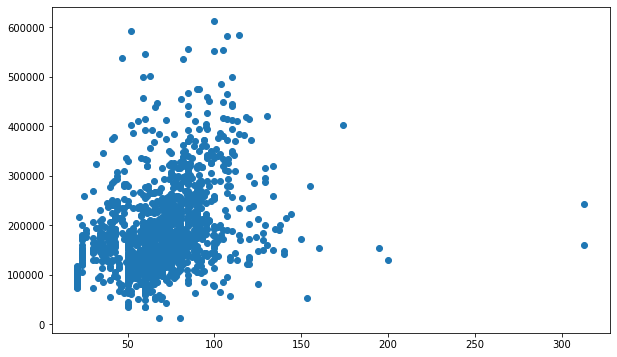

In [98]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_na['Lot Frontage'], dropped_na['SalePrice']);

In [74]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
metrics.mean_squared_error(y, y_pred, squared=False)

ValueError: Found input variables with inconsistent numbers of samples: [2049, 1721]

In [57]:
y_pred, y_intercept, y_coef = slr_model(X, y)

In [84]:
metrics.mean_squared_error(y, y_pred, squared=False)

74501.74563041469

## Lot Area (Continous):

In [63]:
train_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [66]:
train_df[train_df['Lot Area'] > 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


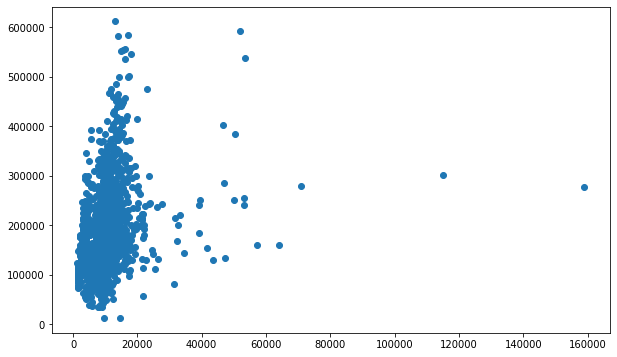

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Lot Area'], train_df['SalePrice']);

In [68]:
dropped_area = train_df.drop(train_df[train_df['Lot Area'] > 100000].index)

In [72]:
dropped_area.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


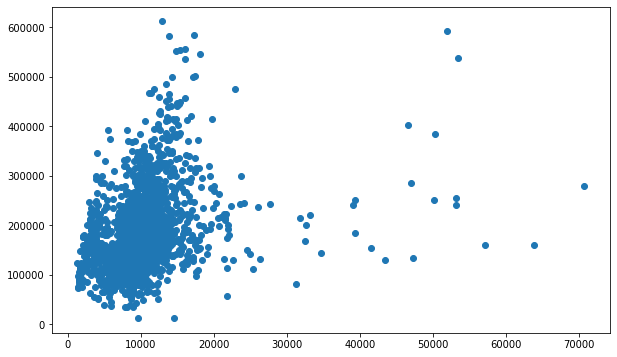

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_area['Lot Area'], dropped_area['SalePrice']);

In [77]:
X = dropped_area[['Lot Area']]
y = dropped_area['SalePrice']

In [85]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 74501.74563041469'

## Street (Nominal):

In [86]:
street_dummies = train_df[['Id','Street']]
street_new = pd.get_dummies(columns=['Street'], data=street_dummies, drop_first=True)

In [92]:
street_new.head(1)

,Id,Street_Pave
0,109,1


In [94]:
X = street_new[['Street_Pave']]
y = train_df['SalePrice']

In [95]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 79045.84089947173'

## Alley (Nominal):

In [106]:
train_df['Alley'].isna().sum()

1911

There are to many na values so disregard

## Lot Shape (Ordinal):

In [109]:
train_df['Lot Shape'].isna().sum()

0

In [112]:
train_df['Lot Shape'].unique()

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [113]:
lot_dummies = train_df[['Id','Lot Shape']]
street_new = pd.get_dummies(columns=['Lot Shape'], data=lot_dummies, drop_first=True)

In [115]:
street_new.head(1)

,Id,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg
0,109,0,0,0


In [117]:
X = street_new[['Lot Shape_IR2', 'Lot Shape_IR3', 'Lot Shape_Reg']]
y = train_df['SalePrice']

In [118]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 75338.57111167454'

## Land Contour (Nominal):

In [121]:
train_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [123]:
train_df['Land Contour'].unique()

array(['Lvl', 'HLS', 'Bnk', 'Low'], dtype=object)

In [127]:
train_df['Land Contour'].isna().sum()

0

In [149]:
land_dummies = train_df[['Id','Land Contour']]
land_new = pd.get_dummies(columns=['Land Contour'], data=land_dummies, drop_first=True)

In [131]:
land_new.head(1)

,Id,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl
0,109,0,0,1


In [139]:
X = land_new[['Land Contour_HLS', 'Land Contour_Low', 'Land Contour_Lvl']]
y = train_df['SalePrice']

In [140]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 77054.93007375672'

## Utilities (Ordinal):

In [142]:
train_df['Utilities'].unique()

array(['AllPub', 'NoSeWa', 'NoSewr'], dtype=object)

In [143]:
train_df['Utilities'].isna().sum()

0

In [144]:
train_df['Utilities'].value_counts()

AllPub    2049
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64

## Lot Config (Nominal):

In [145]:
train_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [147]:
train_df['Lot Config'].unique()

array(['CulDSac', 'Inside', 'Corner', 'FR2', 'FR3'], dtype=object)

In [148]:
train_df['Lot Config'].isna().sum()

0

In [151]:
lc_dummies = train_df[['Id','Lot Config']]
lc_new = pd.get_dummies(columns=['Lot Config'], data=lc_dummies, drop_first=True)

In [154]:
lc_new.head(1)

,Id,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside
0,109,1,0,0,0


In [156]:
X = lc_new[['Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_Inside']]
y = train_df['SalePrice']

In [157]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 78173.48798739813'

## Land Slope (Ordinal):

In [160]:
train_df['Land Slope'].isna().sum()

0

In [163]:
train_df['Land Slope'].unique()

array(['Gtl', 'Sev', 'Mod'], dtype=object)

In [164]:
ls_dummies = train_df[['Id','Land Slope']]
ls_new = pd.get_dummies(columns=['Land Slope'], data=ls_dummies, drop_first=True)

In [166]:
ls_new.head(2)

,Id,Land Slope_Mod,Land Slope_Sev
0,109,0,0
1,544,0,0


In [193]:
X = ls_new[['Land Slope_Mod', 'Land Slope_Sev']]
y = train_df['SalePrice']

In [194]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 79081.11373619334'

## Neighborhood (Nominal):

In [179]:
train_df['Neighborhood'].unique()

array(['Sawyer', 'SawyerW', 'NAmes', 'Timber', 'Edwards', 'OldTown',
       'BrDale', 'CollgCr', 'Somerst', 'Mitchel', 'StoneBr', 'NridgHt',
       'Gilbert', 'Crawfor', 'IDOTRR', 'NWAmes', 'Veenker', 'MeadowV',
       'SWISU', 'NoRidge', 'ClearCr', 'Blmngtn', 'BrkSide', 'NPkVill',
       'Blueste', 'GrnHill', 'Greens', 'Landmrk'], dtype=object)

In [180]:
train_df['Neighborhood'].isna().sum()

0

In [191]:
neigh_dummies = train_df[['Id','Neighborhood']]
neigh_new = pd.get_dummies(columns=['Neighborhood'], data=neigh_dummies, drop_first=True)

In [195]:
neigh_list = neigh_new.columns

# neigh_list

In [198]:
X = neigh_new[neigh_list]
y = train_df['SalePrice']

In [199]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    return y_pred, y_intercept, y_coef
y_pred, y_intercept, y_coef = slr_model(X, y)
f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

'MSE is 51439.027881562164'

## Condition 1 (Nominal):

In [201]:
train_df['Condition 1'].unique()

array(['RRAe', 'Norm', 'PosA', 'Artery', 'Feedr', 'PosN', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

In [203]:
train_df['Condition 1'].isna().sum()

0

In [204]:
c1_dummies = train_df[['Id','Condition 1']]
c1_new = pd.get_dummies(columns=['Condition 1'], data=c1_dummies, drop_first=True)

In [207]:
c1_new.head()

,Id,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn
0,109,0,0,0,0,1,0,0,0
1,544,0,1,0,0,0,0,0,0
2,153,0,1,0,0,0,0,0,0
3,318,0,1,0,0,0,0,0,0
4,255,0,1,0,0,0,0,0,0


In [213]:
c1_list = c1_new.columns

In [214]:
X = c1_new[c1_list]
y = train_df['SalePrice']

In [266]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [267]:
get_dummies(train_df, 'Condition 1')

MSE is 77261.61260612997


## Condition 2 (Nominal):

In [268]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [269]:
get_dummies(train_df, 'Condition 2')

MSE is 78202.16353246666


## Bldg Type (Nominal):

In [271]:
train_df['Bldg Type'].isna().sum()

0

In [275]:
train_df['Bldg Type'].unique()

array(['1Fam', 'TwnhsE', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [ ]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [276]:
get_dummies(train_df, 'Bldg Type')

MSE is 77618.5859991508


## House Style (Nominal):

In [278]:
train_df['House Style'].isna().sum()

0

In [279]:
train_df['House Style'].unique()

array(['2Story', '1Story', '1.5Fin', 'SFoyer', 'SLvl', '2.5Unf', '2.5Fin',
       '1.5Unf'], dtype=object)

In [280]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [281]:
get_dummies(train_df, 'House Style')

MSE is 76192.44379481499


## Overall Qual (Ordinal):

In [283]:
train_df['Overall Qual'].isna().sum()

0

In [284]:
train_df['Overall Qual'].unique()

array([ 6,  7,  5,  8, 10,  4,  9,  3,  2,  1])

In [285]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [288]:
get_dummies(train_df, 'Overall Qual')

MSE is 43341.55272543307


## Overall Cond (Ordinal):

In [289]:
train_df['Overall Cond'].isna().sum()

0

In [290]:
train_df['Overall Cond'].unique()

array([8, 5, 7, 6, 3, 9, 2, 4, 1])

In [291]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [292]:
get_dummies(train_df, 'Overall Cond')

MSE is 72476.27077779928


## Year Built (Discrete):

In [294]:
train_df['Year Built'].isna().sum()

0

In [295]:
train_df['Year Built'].describe()

count    2051.000000
mean     1971.708922
std        30.177889
min      1872.000000
25%      1953.500000
50%      1974.000000
75%      2001.000000
max      2010.000000
Name: Year Built, dtype: float64

In [297]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [298]:
get_dummies(train_df, 'Year Built')

MSE is 58027.0760014683


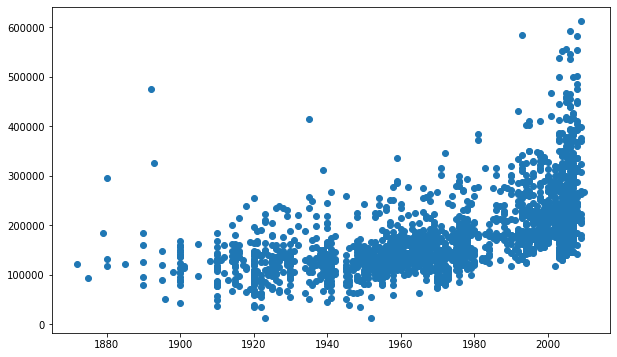

In [307]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Year Built'], train_df['SalePrice']);

## Year Remod/Add (Discrete):

In [299]:
train_df['Year Remod/Add'].isna().sum()

0

In [300]:
train_df['Year Remod/Add'].describe()

count    2051.000000
mean     1984.190151
std        21.036250
min      1950.000000
25%      1964.500000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: Year Remod/Add, dtype: float64

In [303]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [304]:
get_dummies(train_df, 'Year Remod/Add')

MSE is 64037.76521858354


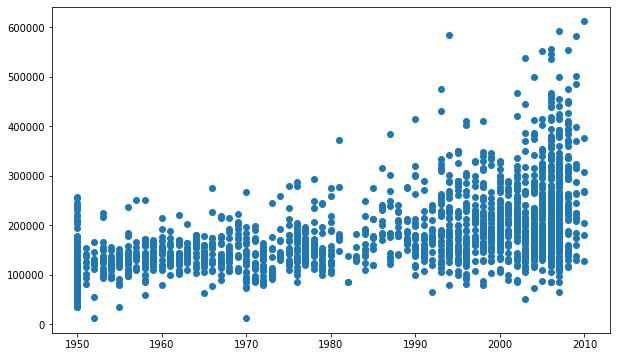

In [305]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Year Remod/Add'], train_df['SalePrice']);

## Roof Style (Nominal):

In [308]:
train_df['Roof Style'].isna().sum()

0

In [309]:
train_df['Roof Style'].unique()

array(['Gable', 'Hip', 'Flat', 'Mansard', 'Shed', 'Gambrel'], dtype=object)

In [316]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [317]:
get_dummies(train_df, 'Roof Style')

MSE is 76321.36863961746


## Roof Matl (Nominal):

In [313]:
train_df['Roof Matl'].isna().sum()

0

In [315]:
train_df['Roof Matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
ClyTile       1
Membran       1
Name: Roof Matl, dtype: int64

## Exterior 1 (Nominal):

In [319]:
train_df['Exterior 1st'].isna().sum()

0

In [320]:
train_df['Exterior 1st'].value_counts()

VinylSd    724
MetalSd    331
HdBoard    300
Wd Sdng    276
Plywood    152
CemntBd     90
BrkFace     64
WdShing     45
AsbShng     33
Stucco      27
BrkComm      3
Stone        2
CBlock       2
AsphShn      1
ImStucc      1
Name: Exterior 1st, dtype: int64

In [326]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [327]:
get_dummies(train_df, 'Exterior 1st')

MSE is 71220.85977327419


## Exterior 2 (Nominal):

In [328]:
train_df['Exterior 2nd'].isna().sum()

0

In [329]:
train_df['Exterior 2nd'].value_counts()

VinylSd    721
MetalSd    324
HdBoard    275
Wd Sdng    262
Plywood    185
CmentBd     90
Wd Shng     63
BrkFace     34
Stucco      30
AsbShng     28
Brk Cmn     17
ImStucc     11
Stone        6
AsphShn      3
CBlock       2
Name: Exterior 2nd, dtype: int64

In [331]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [332]:
get_dummies(train_df, 'Exterior 2nd')

MSE is 71879.6399617099


## Mas Vnr Type (Nominal):

In [342]:
train_df['Mas Vnr Type'].unique()

array(['BrkFace', 'None', nan, 'Stone', 'BrkCmn'], dtype=object)

## Mas Vnr Area (Continous):

In [344]:
train_df['Mas Vnr Area'].isna().sum()

22

## Exter Qual (Ordinal):

## Exter Cond (Ordinal):

In [358]:
train_df['Exter Cond'].isna().sum()

0

In [360]:
train_df['Exter Cond'].value_counts()

TA    1778
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [362]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [363]:
get_dummies(train_df, 'Exter Cond')

MSE is 77903.2164858185


## Foundation (Nominal):

In [364]:
train_df['Foundation'].isna().sum()

0

In [365]:
train_df['Foundation'].value_counts()

PConc     926
CBlock    863
BrkTil    221
Slab       34
Stone       5
Wood        2
Name: Foundation, dtype: int64

In [368]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [369]:
get_dummies(train_df, 'Foundation')

MSE is 66842.88564584788


## Bsmt Qual (Ordinal):

In [370]:
train_df['Bsmt Qual'].isna().sum()

55

In [372]:
dropped_bsmtq = train_df.drop(train_df[train_df['Bsmt Qual'].isna()].index)

In [376]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [377]:
get_dummies(dropped_bsmtq, 'Bsmt Qual')

MSE is 55668.59704629122


## Bsmt Cond (Ordinal):

In [378]:
train_df['Bsmt Cond'].isna().sum()

55

In [379]:
dropped_bsmtc = train_df.drop(train_df[train_df['Bsmt Cond'].isna()].index)

In [382]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [383]:
get_dummies(dropped_bsmtc, 'Bsmt Cond')

MSE is 77588.53220616501


## Bsmt Exposure (Ordinal):

In [384]:
train_df['Bsmt Exposure'].isna().sum()

58

In [385]:
dropped_bsmte = train_df.drop(train_df[train_df['Bsmt Exposure'].isna()].index)

In [386]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [387]:
get_dummies(dropped_bsmtc, 'Bsmt Exposure')

MSE is 71623.52744661433


## Bsmt Fin Type 1 (Ordinal):

In [388]:
train_df['BsmtFin Type 1'].isna().sum()

55

In [389]:
dropped_fin1 = train_df.drop(train_df[train_df['BsmtFin Type 1'].isna()].index)

In [390]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [391]:
get_dummies(dropped_fin1, 'BsmtFin Type 1')

MSE is 69901.00086300308


## BmstFin SF 1 (Continous):

In [411]:
train_df['BsmtFin SF 1'].isna().sum()

1

In [395]:
dropped_sf1 = train_df.drop(train_df[train_df['BsmtFin SF 1'].isna()].index)

In [400]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [402]:
get_dummies(dropped_sf1, 'BsmtFin SF 1')

MSE is 51350.79858832293


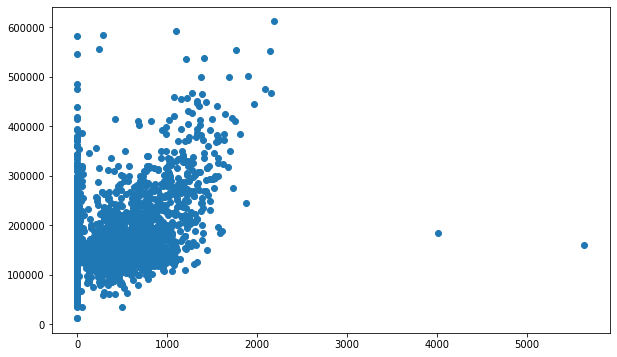

In [404]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_sf1['BsmtFin SF 1'], dropped_sf1['SalePrice']);

## BmstFin Type 2 (Ordinal):

In [408]:
train_df['BsmtFin Type 2'].isna().sum()

56

In [409]:
dropped_bt2 = train_df.drop(train_df[train_df['BsmtFin Type 2'].isna()].index)

In [414]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [415]:
get_dummies(dropped_bt2, 'BsmtFin Type 2')

MSE is 78565.92346922259


## BmstFin SF 2 (Continous):

In [416]:
train_df['BsmtFin SF 2'].isna().sum()

1

In [429]:
dropped_bmsf2 = train_df.drop(train_df[train_df['BsmtFin SF 2'].isna()].index)

In [430]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [431]:
get_dummies(dropped_bmsf2, 'BsmtFin Type 2')

MSE is 78340.83656253487


## Bsmt Unf Sf (Continous):

In [422]:
train_df['Bsmt Unf SF'].isna().sum()

1

In [424]:
dropped_bmunf = train_df.drop(train_df[train_df['Bsmt Unf SF'].isna()].index)

In [434]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [436]:
get_dummies(dropped_bmunf, 'Bsmt Unf SF')

MSE is 52941.54648493982


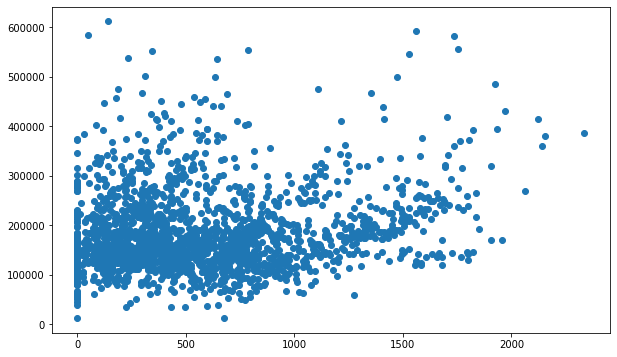

In [437]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_bmunf['Bsmt Unf SF'], dropped_bmunf['SalePrice']);

## Total Bsmt SF (Contionus):

In [439]:
train_df['Total Bsmt SF'].isna().sum()

1

In [440]:
dropped_tbmsf = train_df.drop(train_df[train_df['Total Bsmt SF'].isna()].index)

In [442]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [443]:
get_dummies(dropped_tbmsf, 'Total Bsmt SF') # Get dummies for bsmt sf

MSE is 36472.14395352587


In [446]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [447]:
model_contin(dropped_tbmsf, 'Total Bsmt SF') # Without get dummies

MSE is 61595.791174961276


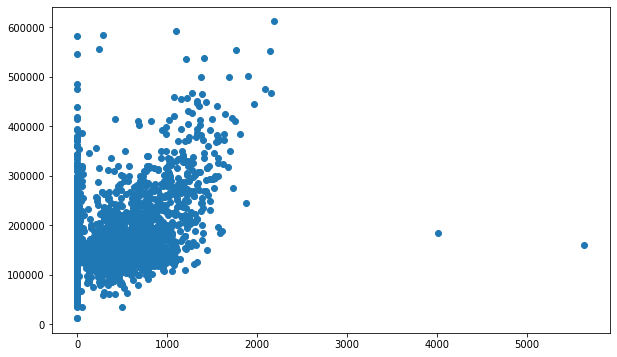

In [444]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_tbmsf['BsmtFin SF 1'], dropped_tbmsf['SalePrice'])

## Heating (Nominal):

In [445]:
train_df['Heating'].isna().sum()

0

In [448]:
def get_dummies(dataframe, dummy_col):
    dummy_df = dataframe[['Id', 'SalePrice', dummy_col]]
    dummy_df = pd.get_dummies(columns=[dummy_col], data=dummy_df, drop_first=True)
    model_X = dummy_df.drop(columns=['Id','SalePrice'])
    model_y = dummy_df['SalePrice']
    slr_model(model_X, model_y)

In [449]:
get_dummies(train_df, 'Heating')

MSE is 78748.0635942168


## HeatingQC (Ordinal):

## Central Air (Nominal):


## Electrical (Ordinal):

## 1st Flr SF (Continous):

## 2nd Flr SF (Continous):

## Low Qual Fin SF (Continous):

## Gr Live Area (Continous):

## Bsmt Full Bath (Discrete):

## Bstm Half Bath (Discrete):

## Full Bath (Discrete):

## Half Bath (Discrete):

## Bedroom (Discrete):

## Kitchen (Discrete):

## Kitchen Qual (Ordinal):

## TotRmsAbvGrd (Discrete):

## Functional (Ordinal):

## Fireplaces (Discrete):

## FireplacesQu (Ordinal):

## Garage Type (Nominal):

## Garage Yr Blt (Discrete):

## Garage Finish (Ordinal):

## Garage Cars (Discrete):

## Garage Area (Contionus):

## Garage Qual (Ordinal):

## Garage Cond (Ordinal):

## Paved Drive (Ordinal):

## Wood Deck SF (Continous):

## Open Porch SF (Continous):

## Enclosed Porch (Continous):

## 3-Ssn Porch (Continous):

## Screen Porch (Continous):

## Pool Area (Continous):

## Pool QC (Ordinal):

## Fence (Ordinal):

## Misc Feature (Nominal):

## Misc Val (Continous):

## Mo Sold (Discrete):

## Yr Sold (Discrete):

## Sale Type (Nominal):

## Sale Condition (Nominal):

In [405]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice'])

In [406]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice'])

In [407]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice'])